**CP2410 Assignment 1 By Ryan Honorica**

*Introduction*

This Assignment takes the data from the Travelling Santa 2018 competition of that year at https://www.kaggle.com/c/traveling-santa-2018-prime-paths. This assignment uses the kernel https://www.kaggle.com/seshadrikolluri/understanding-the-problem-and-some-sample-paths to analyse the users suggested solutions complexity, efficeincy, its running time and how this effects the overall calculated outcome of the solution arrived at in this kernel.  It particularly analyses the Algorithims sieve_of_eratosthenes and nearest_neighbours. These two algorithims are utilised in the kernel to produce a solution for the problem in the competition in conjunction with a third algorithim not analysed in this notebook. This Assignment only analyses 10 percent of the overall input data from the Travelling Santa competition and as such the Running Time overall is much smaller than it would be if a solution was found for the whole data set. The Running Time of an Algorithim can be represented in Big Oh notation, a notation that generally takes the form of:

$$O(n)= Running Time Function(n)$$

With the running time function being derived from the various primitive operations performed within the function, the amount of times a function is looped and how many loops exist within the algorithim itself. These are ultimately indicators of how long an Algorithim will run in respect to an input variable. Running time is often taken in reference to the variable (n) which is representative of the input variable and the amount of time it takes to run the algorithim in respect to that. 

This Runnning Time can be derived theoretically by analysing the function with how and how often the variable is referenced, as well as experimentally by changing the input variable size and seeing how this effects the running time of the function itself through timers. This kind of analysis is crucial for improving the way a code runs and how fast it can process information. This is especially important when processing big data like in this Assignment and moreso in the actual competition Travelling Santa 2018 that this assignment derives from. The first algorithim is as follows.

**Algorithim 1**

*sieve_of_eratosthenes*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import random

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


df_cities = pd.read_csv('../input/cities.csv')
df_cities.head()

#https://www.kaggle.com/seshadrikolluri/understanding-the-problem-and-some-sample-paths
def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)
#https://stackoverflow.com/questions/50173283/pandas-get-first-n-rows-based-on-percentage
percent_rows = int(len(df_cities)*0.1)
ten_percent_data = df_cities.head(percent_rows)

prime_cities = sieve_of_eratosthenes(max(ten_percent_data.CityId))


['cities.csv', 'sample_submission.csv']


**Algorithim 1**

*Analysis*

This Algorithim here takes in the variable n and produces a list of Booleans that represent the numbers within that generated list that are primes. This allows for the compartmentalization of the data in this problem and can reduce the amount of points calculated and used in other algorithims in the kernels solution.

There are 3 primitive operations before the for loop, each initialising a set condition about the nature of a prime number, dictating that 0 and 1 are not primes. However, the first operation is actually a list comprehension, which can be viewed as a for loop which assigns a variable to every i value. This loop occurs within the comprehension \\(n +1\\) times. This results in an initial Time function or Big-Oh function of
$$O(n)=1*(n+1)$$
This is then followed by the two initialisers which actually act as both a list call and an assign function to that list value. This adds 2 actions before the for loop per line. As such the Big Oh equation before the for loop is as follows:

$$O(n) = (n+1)+4$$
$$O(n) = n+5$$

There are 2 loops within the for loop, with an if statement that relates to a value assigned by the value of \\(\sqrt{n}\\).
The first part of the \\(for\\) loop assigns to the value i a value in the range of 2 to the value \\(\sqrt{n}+1\\). This essentially means the value i is assigned a value every loop which loops \\(\sqrt{n} +1 -2\\) times. This assigning can be viewed as a primitive action that occurs within this loop. The value \\(\sqrt{n}\\) is rounded to a whole integer value to allow for the for loop to work. This action can be considered a primitive action but also changes the final time effect of the loop. In assuming that the rounding simply makes the number whole we can assume the final Running Time can be read as:
$$O(n) = n-1$$ 

Considering the worst case scenario of the if statement wherein every value of prime[i] is actually a True value, we can assume it is essentially called every loop. The running time for this is fairly simple as it is simply the sequence access of prime that is related to the above value of i. Though i is assigned by n it is not directly related to n. Therefore the running time of this if statement can be viewed as:
\\(O(n) = 1\\)

Within this if statement is a while loop that is as follows:

 while  i*k <= n:
 
 
Indicating that the variable i, which is assigned by the for loop above, is multiplied by k every time in the while loop and is compared to n. in rearranging this condition we get the comparison of \\(i <= \frac{n}{k}\\). This means that the amount of times this loop runs for is \\(n/k\\). Within this while statement there are 5 primitive actions performed, the sequence access of primes, the assigning value of false, and the addition and assigning of the new k. With all these in mind the final Running Time Big Oh equation of this loop is as follows:

$$O(n) = (\frac{n}{k})*5$$

These 3 equations all multiply together as they are nested within each other and as such must be considered as follows:

$$O(n) = (n-1)*(1)*((\frac{n}{k})*5) $$
$$O(n) = \frac{5}{k}*(n^2-n) $$


This equation is in addition to the previous equations before the for loop. Making the overall Time dependent equation:
$$O(n) = \frac{5}{k}*(n^2-n)+(n+5) $$

Removing the constant as this essentially just an assignment and is arbitray when analysing complexity we get the final equation:

$$O(n) = \frac{1}{k}*(n^2-n)+n  $$

Expanding out further we get:

$$O(n) = \frac{1}{k}n^2 -\frac{1}{k}n +n $$

In general it can be seen that the main component of this Running Time function is \\(O(\frac{n^2}{k})\\). In considering this however, we also see that K is an ever changing value within the while loop, and therefore is far too variable to fully include in the time part of the equation. When considering this logically, we observe that K is consistently assigned to the variable 2 at the beginning of the if statement, and therefore can be viewed as a constant and the final running time of this function can be viewed as \\(O(n^2)\\).
This can be exemplified in the graph shown in the runnable code below. 

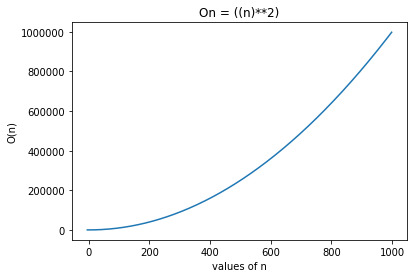

In [2]:
#https://matplotlib.org/users/pyplot_tutorial.html
import numpy as np
import matplotlib.pyplot as plt

#http://courses.csail.mit.edu/6.867/wiki/images/3/3f/Plot-python.pdf
n = np.arange(-5, 1000, 1)
On = ((n)**2)
plt.plot(n, On) # Create line plot with yvals against xvals
plt.title('On = ((n)**2)')
plt.ylabel('O(n)')
plt.xlabel('values of n')
plt.show()


It can be seen in the figure above that this O(n) function is relatively exponential in nature. Thinking about this in relation to the function it makes sense, as the complexity of the code would increase exponentially as the size of the list made by the function is increased and the number of potential prime numbers increases dramatically. However, experimentally, this may not exactly be the case as shown below.

If we were to have the function run for a greatly increased value of n, we can see that the time taken to run the code also increases. This can specifically be observed in each line of code below:


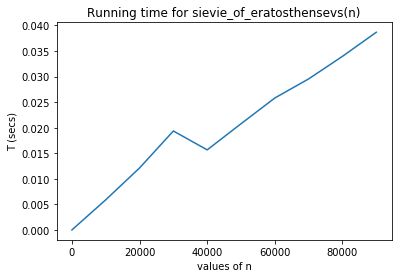

In [3]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import time
import matplotlib.pyplot as plt
#https://www.kaggle.com/seshadrikolluri/understanding-the-problem-and-some-sample-paths
def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)

increment = [ i for i in range(1, 100000,10000)]
times = []
for i in increment:
    start = time.time()
    sieve_of_eratosthenes(i)
    end = time.time()
    times.append(end-start)



#http://courses.csail.mit.edu/6.867/wiki/images/3/3f/Plot-python.pdf
n = increment
T = times
plt.plot(n, T) # Create line plot with yvals against xvals
plt.title('Running time for sievie_of_eratosthensevs(n)')
plt.ylabel('T (secs)')
plt.xlabel('values of n')
plt.show()


Through experimentation we can observe the actual Running Time of this function is actually \\(O(n) = n\\) or something roughly approximating it. This can be derived when considering the original Running Time equation derived theoretically. 

The theoritical analysis defined the final running time as  \\(O(n^2)\\). But when considering the fact that these variables are controlled by the variable K this becomes the worst case scenario setup and therefore can be ommitted when considering real world run time. Considering this we can observe that instead the main running time variable is actually the \\(n\\) in \\(O(n) = \frac{1}{k}n^2 -\frac{1}{k}n +(n)\\). 

This approximation is not entirely true, as can be seen in the graph above. There are occassional bumps where the processing time seems to increase at a different rate than n and in these moments the other components of the Running Time equation may factor in again. It can be seen that through re-interpreting the Theoretical Analysis in consideration of the Experimental Analsysis we get a better understanding of the Complexity of the system and its overall running time. As such the Running Time can still be observed as:
$$O(n) = \frac{1}{k}n^2 -\frac{1}{k}n +n $$

**Algorithim 2**

*nearest_neighbour
*

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import random

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


df_cities = pd.read_csv('../input/cities.csv')
df_cities.head()
#https://stackoverflow.com/questions/50173283/pandas-get-first-n-rows-based-on-percentage
percent_rows = int(len(df_cities)*0.1)
ten_percent_data = df_cities.head(percent_rows)
df_cities = ten_percent_data

#https://www.kaggle.com/seshadrikolluri/understanding-the-problem-and-some-sample-paths
def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)


prime_cities = sieve_of_eratosthenes(max(ten_percent_data.CityId))

def total_distance(dfcity,path):
    prev_city = path[0]
    total_distance = 0
    step_num = 1
    for city_num in path[1:]:
        next_city = city_num
        total_distance = total_distance + \
            np.sqrt(pow((dfcity.X[city_num] - dfcity.X[prev_city]),2) + pow((dfcity.Y[city_num] - dfcity.Y[prev_city]),2)) * \
            (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city]))))
        prev_city = next_city
        step_num = step_num + 1
    return total_distance


# Function from XYZT's Kernel on the same topic. 
def nearest_neighbour():
    cities = pd.read_csv("../input/cities.csv")
    percent_rows = int(len(cities)*0.1)
    ten_percent_data = cities.head(percent_rows)
    cities = ten_percent_data
    ids = cities.CityId.values[1:]
    xy = np.array([cities.X.values, cities.Y.values]).T[1:]
    path = [0,]
    while len(ids) > 0:
        last_x, last_y = cities.X[path[-1]], cities.Y[path[-1]]
        dist = ((xy - np.array([last_x, last_y]))**2).sum(-1)
        nearest_index = dist.argmin()
        path.append(ids[nearest_index])
        ids = np.delete(ids, nearest_index, axis=0)
        xy = np.delete(xy, nearest_index, axis=0)
    path.append(0)
    return path

nnpath = nearest_neighbour()
print('Total distance with the Nearest Neighbor path '+  "is {:,}".format(total_distance(df_cities,nnpath)))

Total distance with the Nearest Neighbor path is 464,127.81603733986


**Algorithim 2**

*Analysis*

This aspect of the analysis analyses the function nearest_neighbour, which is an algorithim that takes an input array of the input file, processes 10 percent of the total data points and then calculates the points closest to one another in that array, producing a smaller array of the appended points and making this as a path array. This algorithim is used to solve the problem stated in this Kernels competition and has been altered for this assignment such that only 10 percent of the data is calculated and created into a path. 

The difference between the two algorithims is primarily data structure and how the code centers around that data structure. Whereas the previous Algorithim operated on a List data structure and as such only had a single dimension list to deal with, this algorithim must deal with a multi-dimensional array to process data from. Fundamentally these two Algorithims process different things but the running time varies quite a lot due to the difference in structure.The Running Time can still be found theoretically when the function is analysed. 

To begin with, we can see there are a multitude of primitive functions, each assigning a single value before anything to do with array manipulation is done. 
The \\(cities\\) variable is assigned via a primitive operation in which the input file is read. This is both a read and assign so 2 operations. 

cities = pd.read_csv("../input/cities.csv")


The following line has 3 simple operations where a variable is assigned to percent_rows after the length of the array is multiplied by 0.1 and then rounded. These actually have similar runnning time functions as the lists, they simply measure and round different parameters. However, len simply returns a number value and therefore has 1 primitive operation, as do int for rounding and multiplying by 0.1.

percent_rows = int(len(cities)*0.1)

This sections Running Time is therefore as follows:

$$O(n) = 1+1+1 $$
$$O(n) = 3$$

The next line utilises the head function which takes the length of the 10 percent, and uses it to measure from the head of the array to the end of the array. Meaning it depends on the input N value, where the cities input is in the Array form N*M. 

    ten_percent_data = cities.head(percent_rows)


This new array of values is assigned to a variable array cities. This sections Running Time is therefore as follows:
$$O(n) = 1*(n) $$

The next line simply assigns this array to the variable array cities so it is simply 1:
$$O(n) = 1 $$

The next two lines are rather complicated as they relate to indexing specific values in the Array. 
In the line following the assignment of cities, this is what is done:

ids = cities.CityId.values[1:]

This in essence indexes the values twice, such that it only grabs all of the CityId's off the array. Indexing an array once produces the Running Time function 
$$O(n) = (k+1)^2$$

The line after this is this:

xy = np.array([cities.X.values, cities.Y.values]).T[1:]

This line indexes once again twice, as well as indexing these two indexed values such that it changes the orienation of the array. 
as such this can line can be viewed as follows:

$$O(n) = 2(k+1)^3$$

The next line is a simple array assignment to the variable path. This can be viewed as follows:
$$O(n) = 1$$

This next line is a while statement that checks if the length of the array of ids is larger than 0, as in checking if the array is empty. This is a simple statement that simply passes the array through the len function, with a Running Time of \\(O(n) =1\\)

The next few lines are somewhat more simple:

last_x, last_y = cities.X[path[-1]], cities.Y[path[-1]]

This essentially creates a tuple with the two values being assigned by an indexed value in the cities Array. Since this is done with 2 operations and done twice for this line, the Running time can be viewed as:
$$O(n) = 4(k+1)$$

This next line measures the distancy between the previously found points with the points in the array xy. 

dist = ((xy - np.array([last_x, last_y]))**2).sum(-1):

this line casts the two values as an array and then puts this array to the power of 2. There is then a subtraction of the two data arrays. This is then summed together using the sum function which takes a run time of 1. Utilising our knowledge of Pythone's Sequence types it can be observed
$$O(n) = 1+1+1+1 = 4$$

This next line simply casts the value of the index of the current nearest_city and casts it to nearest_index

nearest_index = dist.argmin()

This is a simple pop and assign, meaning they are both simple operations and as such:
$$O(n) = 2$$

This next line simply appends this new value to path. 

path.append(ids[nearest_index])

This operation is a simple assign and as such:
$$O(n) = 1$$

This line is the equivalent of popping the id of the nearest_city from the array. This operation is similarly a running time of 1. However, if this array is armortized then the Running time is \\(O(n) = n-k\\).

ids = np.delete(ids, nearest_index, axis=0)

In considering this, the Big Oh is as follows:

$$O(n) = 1$$

This is the same as the previous line but deletes the values from the xy array.

xy = np.delete(xy, nearest_index, axis=0)

therefore:
$$O(n) = 1$$


This next line is a simple appending. 

path.append(0)

This operation is a primitive one and therefore the running time for this is as follows:
$$O(n) = 1$$


This next line returns the array path. This is a simple return operation.

return path

$$O(n) = 1$$

Summing all of the simple operations and then multiplying them by the while loop running time is as follows: 
$$O(n) = (1+1+1+1+(n-k) +1 + 2 +4 + 4(k+1))*1 $$
$$O(n) = 11+ (n-k)+4(k+1) $$

Then we simply add the outside Running Time functions and we return a function of:
$$O(n) = 11+ (n-k)+4(k+1) + 1 +2(k+1)^3 +(k+1)^2 + 1 + n + 3  $$

$$O(n) = 2(k+1)^3 +(k+1)^2  + 4(k+1)+ (n-k)+ 16 $$

Removing some of the constants as they don't completely alter the nature of the Running time, we get the Running Time:
$$O(n) = (k+1)^3 +(k+1)^2 +(k+1)+ (n-k) $$
Exapnding this further we get:
$$O(n) = k^3 + 4k^2 + 4k + 3 + n$$

This would show that most of this equation relies heavily upon the value of K. K would seemingly be a variable in this circumstance, which would potentially be changing throughout the algorithim. If we assume however that the value of K is simply the dimension of the array that is passed through the algorithim we can say K is 3. However we can also say that K is 2 at a certain point in the algorithim as the dimensions of the array passed change from 3*N to 2*N. Regardless, we can bring down the complexity to either of these two values and we ultimately get the function:

$$O(n) = constant + 3 + n$$

Which means that despite this codes complexity it actually runs in \\(O(n)\\) time. This would indicate that this code is quite useful as a linearly growing Running Time and will grow in complexity at the same rate across the entirety of the length of the input. This means that the complexity will not grow too much to calculate past a certain point as other Running Time functions might. It can be observed that most of the operations that occur during the calculation are a kind of primitive operation and don't entirely relate to the length of the array and as such do not completely relate to the running time. 

This complexity can be observed in the code below. 

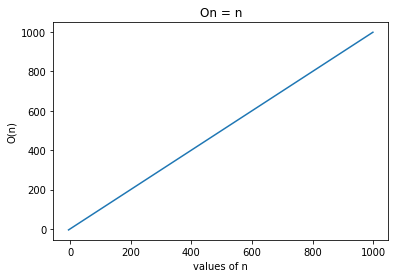

In [5]:
#https://matplotlib.org/users/pyplot_tutorial.html
import numpy as np
import matplotlib.pyplot as plt

#http://courses.csail.mit.edu/6.867/wiki/images/3/3f/Plot-python.pdf
n = np.arange(-5, 1000, 1)
On = n
plt.plot(n, On) # Create line plot with yvals against xvals
plt.title('On = n')
plt.ylabel('O(n)')
plt.xlabel('values of n')
plt.show()

The complexity can be observed directly by changing the amount of the array that is processed. This is done by changing the percentage of the input. This can be observed as follows. 

Total distance with the Nearest Neighbor path is 0.0
Total distance with the Nearest Neighbor path is 219,124.72160779472
Total distance with the Nearest Neighbor path is 294,289.1012842342
Total distance with the Nearest Neighbor path is 356,299.3632398498
Total distance with the Nearest Neighbor path is 417,369.06488495297
Total distance with the Nearest Neighbor path is 464,127.81603733986


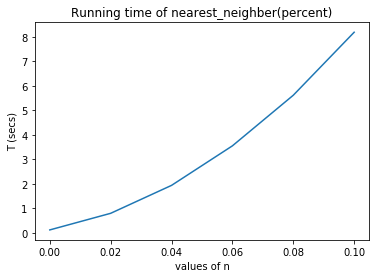

In [6]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import random

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


df_cities = pd.read_csv('../input/cities.csv')
df_cities.head()
#https://stackoverflow.com/questions/50173283/pandas-get-first-n-rows-based-on-percentage
percent_rows = int(len(df_cities)*0.1)
ten_percent_data = df_cities.head(percent_rows)
df_cities = ten_percent_data

#https://www.kaggle.com/seshadrikolluri/understanding-the-problem-and-some-sample-paths
def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)


prime_cities = sieve_of_eratosthenes(max(ten_percent_data.CityId))

def total_distance(dfcity,path):
    prev_city = path[0]
    total_distance = 0
    step_num = 1
    for city_num in path[1:]:
        next_city = city_num
        total_distance = total_distance + \
            np.sqrt(pow((dfcity.X[city_num] - dfcity.X[prev_city]),2) + pow((dfcity.Y[city_num] - dfcity.Y[prev_city]),2)) * \
            (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city]))))
        prev_city = next_city
        step_num = step_num + 1
    return total_distance


# Function from XYZT's Kernel on the same topic. 
def nearest_neighbour(percent):
    cities = pd.read_csv("../input/cities.csv")
    percent_rows = int(len(cities)*percent)
    ten_percent_data = cities.head(percent_rows)
    cities = ten_percent_data
    ids = cities.CityId.values[1:]
    xy = np.array([cities.X.values, cities.Y.values]).T[1:]
    path = [0,]
    while len(ids) > 0:
        last_x, last_y = cities.X[path[-1]], cities.Y[path[-1]]
        dist = ((xy - np.array([last_x, last_y]))**2).sum(-1)
        nearest_index = dist.argmin()
        path.append(ids[nearest_index])
        ids = np.delete(ids, nearest_index, axis=0)
        xy = np.delete(xy, nearest_index, axis=0)
    path.append(0)
    return path

increment = [i/100 for i in range(0,12,2)]
times = []
for i in increment:
    start = time.time()
    nnpath = nearest_neighbour(i)
    end = time.time()
    times.append(end-start)
    print('Total distance with the Nearest Neighbor path '+  "is {:,}".format(total_distance(df_cities,nnpath)))

n = increment
T = times
plt.plot(n, T) # Create line plot with yvals against xvals
plt.title('Running time of nearest_neighber(percent)')
plt.ylabel('T (secs)')
plt.xlabel('values of n')
plt.show()



This code and the graph above seem to indicate that unlike the theoritically derived Running time of \\(O(n) = n\\) the Running Time is:
$$O(n) = n^2$$
This would seem to indicate something specific about the way the function has changed to allow for the graphing of the Running time. In the previous code there was no input to the function and its only input was the array itself, kept at a fixed time frame. However, there is now also a new input element involved in the calculation of the variable percentage, here in the above code as input i. If we take i to also be represented by the value n then we ultimately end up with the Running Time trend observed in the graph above as it can percieved as ultimately

$$O(n) = const + 3 + (n*i)$$

In assuming i is also n:

$$O(n) = const + 3 + n^2$$

However, in considering this, if we simply remove the changing input variable of i such that the percentage value is constant, we then recieve the original Running Time function:
$$O(n) = const + 3 + n$$

**Conclusion**

***Efficiency of Algorithim 1 and Algorithim 2***

When considering both equations we see the general efficiency is roughly the same, but there are differences depending on the nature of the data structure. It should be noted that the overall running time and efficiency of the solution in this kernel is dependent on the 3 functions written into the section Algorithim 2 of this Notebook. These functions being:
*  sieve_of_eratosthenes
* total_distance
* nearest_neighbour

Though total_distance was not ultimately analysed in this assignment due to limitations, the final solution of this kernel and this series of codes are all related. With sieve_of_eratosthenes being nested within total_distance as well as nearest_neighbour. Ultimately the final running time would be a combination of both of the 2 equations nested within the Running time of the function total_distance. 

*Algorithim 1*

Algorithim 1, the function defined as sieve_of_eratosthenes(n) was theoretically analysed to have a running time equation of:
$$O(n) = \frac{1}{k}n^2 -\frac{1}{k}n +n $$

The value of k was ultimately omitted in the overall theoretical analysis and was eventually reduced down to \\(O(n) = n\\). However, this was discovered to be incorrect Experimentally as there were points in the Running Time figure that suggested that though the general trend was linear, the running time also depended on the value k. This value of k was a variable value that changed irregardless of the value of n and was ultimately ignored. However it was shown experimentally to have a fairly significant part in the overall efficiency of the run time of this algorithm. The value of k can't completely be predicted as it is ultimately a comparing factor that increases throughout the while loop of the Function. This is also why the functions run time changes sporadically as well, as this while loop may also only run for n/k times, with k changing size throughout the loop. This means that the Running time equation ultimatley does require the \\(frac{1}{k}n^2 -\frac{1}{k}n\\) component of the original theoretical analysis. This means this function is slightly more complex than Algorithim 2 as it has a constantly varying Running Time dependent on a variable assigned within its for loop.

Efficiency wise this while loop adds inefficiency to the function, as it has both a divide primitive action and a comparing action against the defined input. But it varies within the function so there is additional primitives associated with it. This incrementation and comparison can clog the calculation of the number of primes and ultimately can run through the entire array created at the beginning of the function to check if a prime is present or not. Though this function may do what is intended of it, it is fundamentally flawed as it runs through each element of the list for the entire length of the loop. 

The complexity of the function is shown in the final Running Time equation, wherein there is a while loop nested within a for loop, causing an \\(\frac{1}{k}n^2\\) to be present in the equation and making the overall running time a kind of exponential equation. Though the overal running time produced by an exponential isn't the worst when compared to other running time equations, it is not as good as a linear Running Time equation as it can reach extremely high values once it has arrived at a certain point. 

In regards to the final solution produced by the codes present in this kernel, the Running time of each function is nested within each of the functions proceeding the final solution. So with the partially linear/partially exponential Running Time of Algorithim 1 involved, we would ultimately get a large exponential Running Time as the length of the input list grows. 

*Algorithim 2*

In Algorithim 2 the theoretical analysis of the function named nearest_neighbour produced the final Running Time function:
$$O(n) = k^3 + 4k^2 + 4k + 3 + n$$
Though in the analysis of Algorithim 2 the Function was simplified down to \\(O(n) = n\\), the actual graph plotted of the running time suggests the original unsimplified Running Time is closer to appropriate Big O function:
$$O(n) = k^3 + 4k^2 + 4k + 3 + n^2$$

However, as mentioned in the analysis, this is due to the variation of the code utilised to graph the change in Running Time. The function was changed such that an input variable was actually applied to the overal equation, meaning an input variable is applied twice, nested within itself. Removing this would return the function back to a linear state. 

In regards to efficiency, a linear Running time is the best running time than any of the other functions save for a running function that is simply a constant. This means that overall this function is the most efficient out of all the functions referenced in this kernels codes thus far. 

Though this algorithim looks complex, it is actually 1 loop with no further nesting and has additional primitive actions all done to the input array. This means there is no real nesting of the input variable and only one loop overall, meaning that it ultimately runs only for the length of the input array, leaving it as a linear equation but also constrained by the nature of the array and its components. The k in the final algorithim analysis relates to one of the dimensions of the input. It relates to the idea that when an array is indexed it must call the number of dimensions as coordinates. As in, if it was a 2 by N array then it would call either one of the first parameters then one of the variables relating to n. The most complex operation done to the array presumably be the primitive operation wherein the values called from it are raised to a power and then summed. However, these are both primitive operations and can be done relatively simply as the array is brought down to a list form for these calculations. 

The overall effect on the final solution of this kernel is that this formula has the least amount of an effect on the running time, as it is simply a linear equation. Though when run differently with a changing percentage value the complexity increases substantially. Overall though this algoirthim is incredibly useful to the final solution but also is extremely efficient in considering what it does. 

